In [2]:
pip install bing_image_downloader 

  Using cached bing_image_downloader-1.1.2-py3-none-any.whl (5.9 kB)
Note: you may need to restart the kernel to use updated packages.


In [8]:
from bing_image_downloader import downloader
downloader.download("American Paint Horse", limit=100,  output_dir='horse_breeds', 
                    adult_filter_off=True, force_replace=False, timeout=60)
downloader.download("Arabian horse", limit=100,  output_dir='horse_breeds', 
                    adult_filter_off=True, force_replace=False, timeout=60)
downloader.download("Gypsy Vanner", limit=100,  output_dir='horse_breeds', 
                    adult_filter_off=True, force_replace=False, timeout=60)

[%] Downloading Images to C:\Users\ebaya\horse_breeds\American Paint Horse


[!!]Indexing page: 1

[%] Indexed 35 Images on Page 1.


[%] Downloading Image #1 from https://galloptodiscover.weebly.com/uploads/4/7/9/0/47904487/maxresdefault_orig.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://www.horsebreedspictures.com/wp-content/uploads/2015/09/American-Paint-Horse-Pictures.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://www.horsebreedspictures.com/wp-content/uploads/2015/09/American-Paint-Horse-Images.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://i2.wp.com/ihearthorses.com/wp-content/uploads/2016/01/Canva-Nice-paint-horse-scaled.jpg
[!] Issue getting: https://i2.wp.com/ihearthorses.com/wp-content/uploads/2016/01/Canva-Nice-paint-horse-scaled.jpg
[!] Error:: HTTP Error 404: Not Found
[%] Downloading Image #4 from http://upload.wikimedia.org/wikipedia/commons/3/36/American_Paint_Horse.JPG
[%] File Downloaded !

[%] Downloading Image #5 

In [2]:
from fastai.vision.all import *

In [3]:
path = Path('horse_breeds')

In [4]:
fns = get_image_files(path)

In [5]:
fns

(#300) [Path('horse_breeds/American Paint Horse/Image_1.jpg'),Path('horse_breeds/American Paint Horse/Image_10.jpg'),Path('horse_breeds/American Paint Horse/Image_100.jpg'),Path('horse_breeds/American Paint Horse/Image_11.jpg'),Path('horse_breeds/American Paint Horse/Image_12.jpg'),Path('horse_breeds/American Paint Horse/Image_13.jpg'),Path('horse_breeds/American Paint Horse/Image_14.jpg'),Path('horse_breeds/American Paint Horse/Image_15.jpg'),Path('horse_breeds/American Paint Horse/Image_16.png'),Path('horse_breeds/American Paint Horse/Image_17.jpg')...]

In [6]:
horse_breeds = DataBlock(
     blocks = (ImageBlock, CategoryBlock),
     get_items = get_image_files,
     splitter = RandomSplitter(valid_pct=0.2, seed=42),
     get_y = parent_label,
     item_tfms = Resize(128)  ## by default it crops
)

In [7]:
dls = horse_breeds.dataloaders(path)

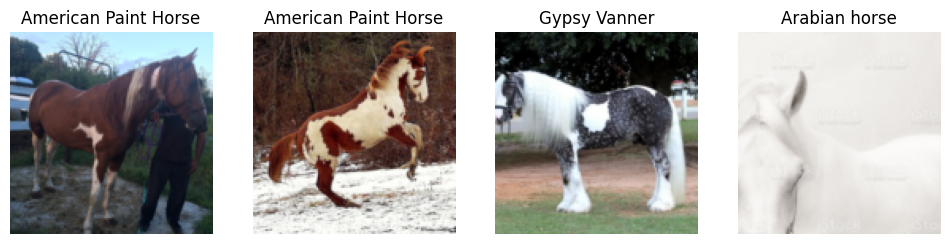

In [8]:
dls.valid.show_batch(max_n=4, nrows=1)

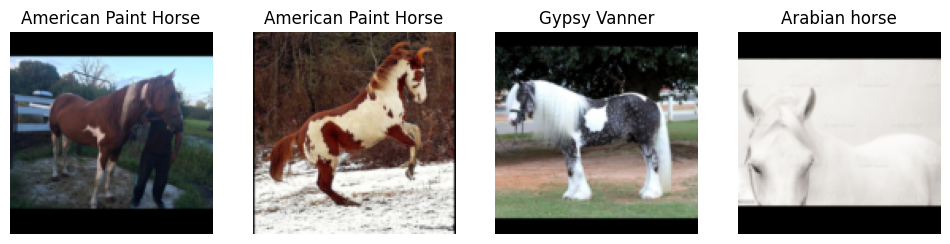

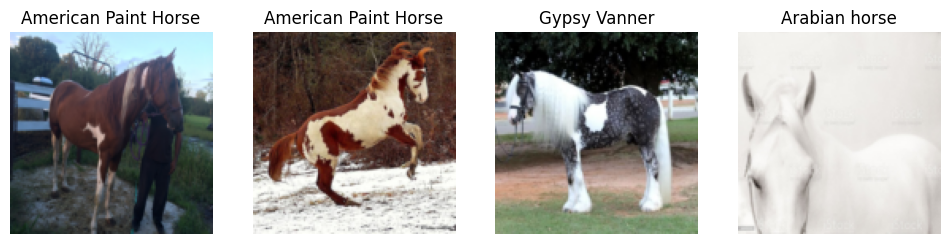

In [9]:
horse_breeds = horse_breeds.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = horse_breeds.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

## or we can squish them

horse_breeds = horse_breeds.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = horse_breeds.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

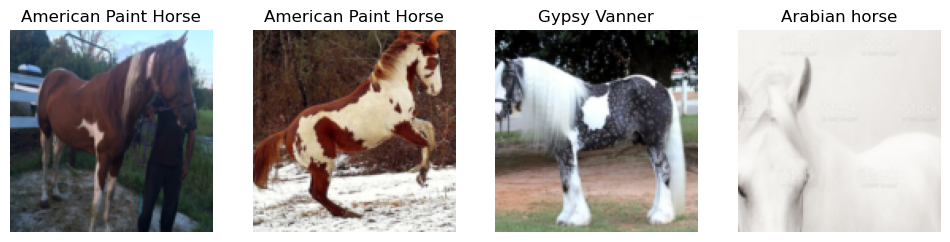

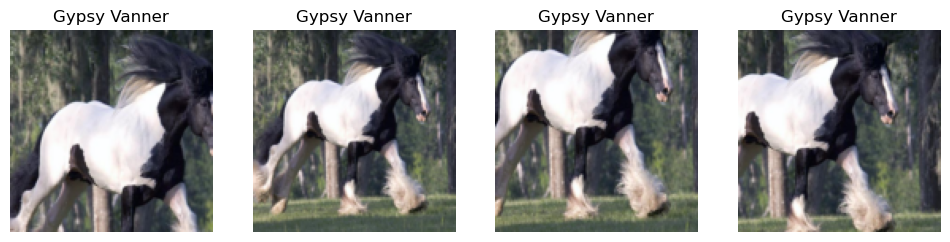

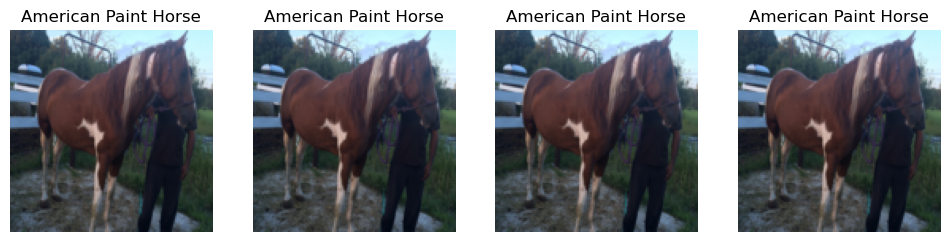

In [18]:
horse_breeds = horse_breeds.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = horse_breeds.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)


horse_breeds = horse_breeds.new(item_tfms=RandomResizedCrop(128, min_scale=0.5))
dls = horse_breeds.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)



horse_breeds = horse_breeds.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = horse_breeds.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1, unique=True)

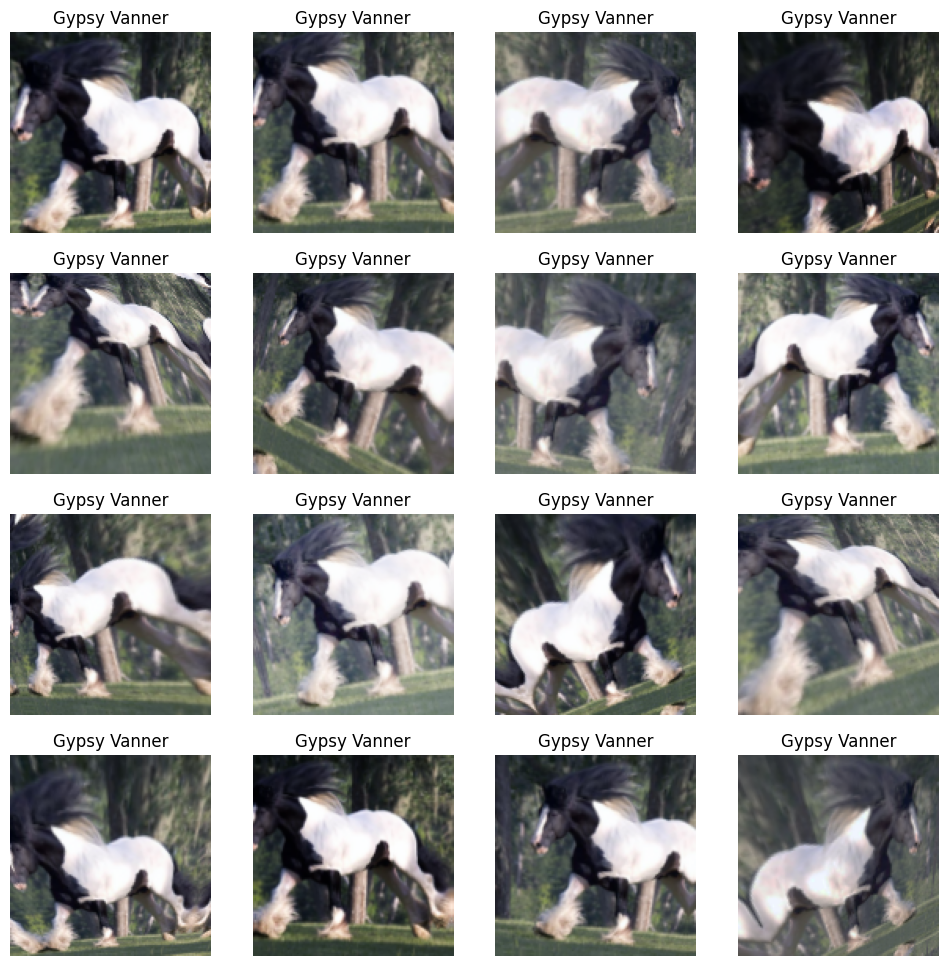

In [10]:
horse_breeds = horse_breeds.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = horse_breeds.dataloaders(path)
dls.train.show_batch(max_n=16, nrows=4, unique=True)

In [11]:
horse_breeds = horse_breeds.new(
     item_tfms=RandomResizedCrop(224, min_scale=0.5),
     batch_tfms=aug_transforms()
)

dls = horse_breeds.dataloaders(  path  )

learn = cnn_learner(dls, resnet18, metrics=error_rate)

learn.fine_tune(4)

C:\Users\ebaya\anaconda3\envs\py37_fastai\lib\site-packages\fastai\vision\learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
C:\Users\ebaya\anaconda3\envs\py37_fastai\lib\site-packages\torchvision\models\_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
C:\Users\ebaya\anaconda3\envs\py37_fastai\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warn

C:\Users\ebaya\anaconda3\envs\py37_fastai\lib\site-packages\PIL\Image.py:997: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


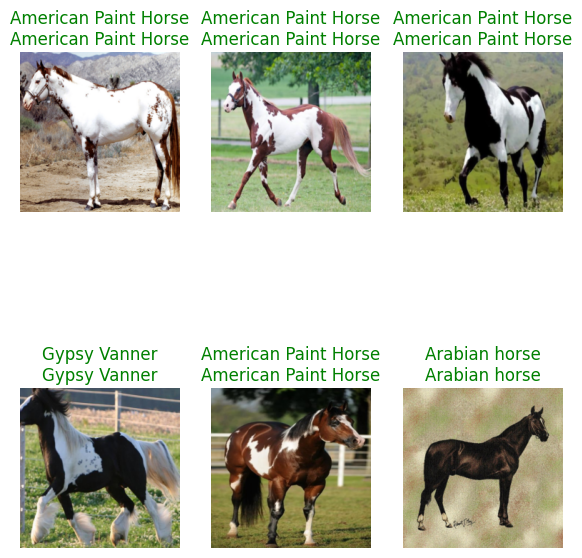

In [21]:
learn.show_results(max_n=6, figsize=(7,8))

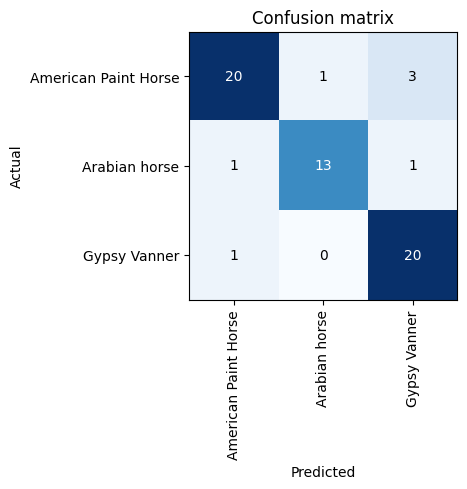

In [22]:
interp = ClassificationInterpretation.from_learner(learn)

interp.plot_confusion_matrix()

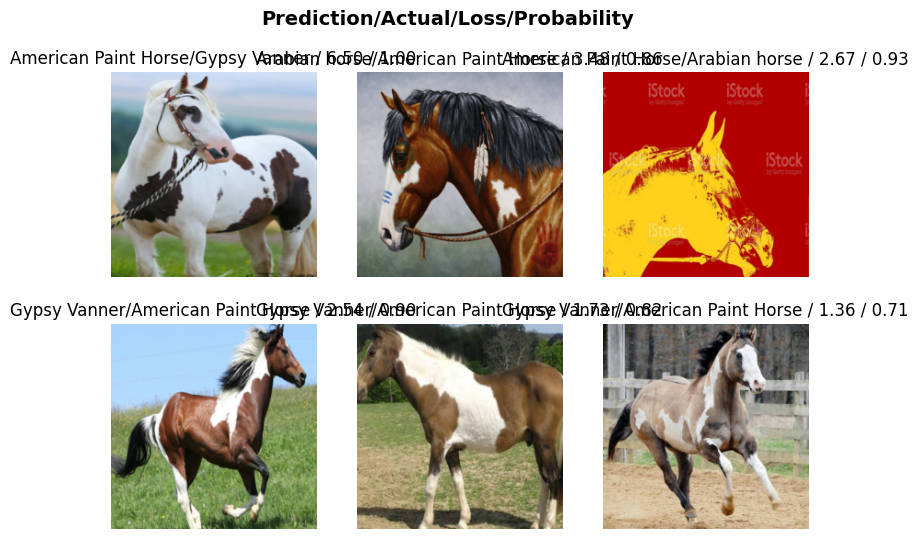

In [27]:
interp.plot_top_losses(6, nrows=2)

In [28]:
learn.export()

In [29]:
learn_inf = load_learner('export.pkl')

learn_inf.predict('horse_breeds/Arabian horse/Image_17.jpg')

('Arabian horse', TensorBase(1), TensorBase([0.0433, 0.9541, 0.0026]))

In [30]:
learn_inf.dls.vocab

['American Paint Horse', 'Arabian horse', 'Gypsy Vanner']